<br />

<div style="text-align: center;">
<font size="7">数値計算2017 試験解答例</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">cc by 西谷@関西学院大・理工 2017 </font>
</div>


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Table of Contents</a></span></li><li><span><a href="#簡単な行列計算" data-toc-modified-id="簡単な行列計算-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>簡単な行列計算</a></span></li><li><span><a href="#誤差(2次方程式)" data-toc-modified-id="誤差(2次方程式)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>誤差(2次方程式)</a></span></li><li><span><a href="#積分" data-toc-modified-id="積分-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>積分</a></span></li><li><span><a href="#最小2乗法(自動車の加速性能)" data-toc-modified-id="最小2乗法(自動車の加速性能)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>最小2乗法(自動車の加速性能)</a></span></li><li><span><a href="#常微分方程式(ボールの自由落下)" data-toc-modified-id="常微分方程式(ボールの自由落下)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>常微分方程式(ボールの自由落下)</a></span></li></ul></div>

# 簡単な行列計算

In [8]:
from sympy import *
import numpy as np

In [13]:
import scipy.linalg   # SciPy Linear Algebra Library

np.set_printoptions(precision=5, suppress=True)

dA = np.diag([1,2,3])
P = np.array([[1,1,2],[1,1,1],[1,0,1]]).transpose()
iP = scipy.linalg.inv(P)
A = P.dot(dA).dot(iP)

print(A)
l, PP = scipy.linalg.eig(A)
print(l)
print(PP)

[[ 4. -1. -1.]
 [ 1.  2. -1.]
 [ 3. -1.  0.]]
[ 1.+0.j  3.+0.j  2.+0.j]
[[-0.40825 -0.70711 -0.57735]
 [-0.40825 -0.      -0.57735]
 [-0.8165  -0.70711 -0.57735]]


# 誤差(2次方程式)

In [5]:
from decimal import *
from numpy import sqrt
def solve_normal_formula(a,b,c):
    x0=(-b-sqrt(b**2-4*a*c))/(2*a)
    x1=(-b+sqrt(b**2-4*a*c))/(2*a)
    return (x0,x1)

def solve_precise_formula(a,b,c):
    x0=(-b-sqrt(b**2-4*a*c))/(2*a)
    x1=c/(a*x0)
    return (x0,x1)


In [11]:
getcontext().prec = 4

print(solve_normal_formula(Decimal('1'),
                           Decimal('40'),
                           Decimal('2')))
print(solve_precise_formula(Decimal('1'),
                            Decimal('40'),
                            Decimal('2')))

(Decimal('-39.95'), Decimal('-0.05'))
(Decimal('-39.95'), Decimal('-0.05006'))


# 積分

In [15]:
from sympy import *
x = symbols('x')
integrate(x**2,(x,0,1))

1/3

In [18]:
def func(x):
    return 1.0*x**2

x, y = [], []
for j in range(0, 10):
    N, x0, xn = 2**j, 0.0, 1.0

    h = (xn-x0)/N
    S = func(x0)/2.0
    for i in range(1, N):
        xi = x0 + i*h
        dS = func(xi)
        S = S + dS

    S = S + func(xn)/2.0
    print("%4d %15.10f %10.5e" % (N, h*S, h*S-1/3))
    x.append(N)
    y.append(abs(h*S-1/3))


   1    0.5000000000 1.66667e-01
   2    0.3750000000 4.16667e-02
   4    0.3437500000 1.04167e-02
   8    0.3359375000 2.60417e-03
  16    0.3339843750 6.51042e-04
  32    0.3334960938 1.62760e-04
  64    0.3333740234 4.06901e-05
 128    0.3333435059 1.01725e-05
 256    0.3333358765 2.54313e-06
 512    0.3333339691 6.35783e-07


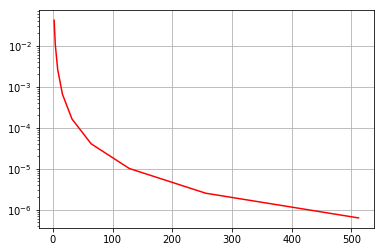

In [17]:
import matplotlib.pyplot as plt

plt.plot(x, y, color = 'r')
plt.yscale('log')
plt.xscale('linear') # or log
plt.grid()
plt.show()

必要な分点の数は，計算結果によると512ぐらい，プロットからは450ぐらい．

# 最小2乗法(自動車の加速性能)

[ 17.34679]


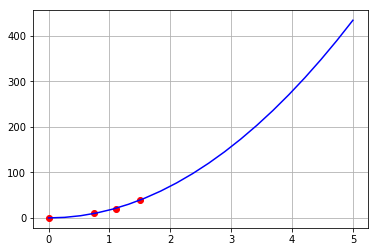

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def f(x, a):
    return a*x**2

xdata = np.array([0,0.751,1.113,1.504])
ydata = np.array([0,10,20,40])
plt.plot(xdata,ydata, 'o', color='r')

params, cov = curve_fit(f, xdata, ydata)
print(params)

x =np.linspace(0,5,20)
a = params[0]
y = f(x,a)
plt.plot(x,y, color='b')

plt.grid()
plt.show()

In [54]:
from sympy import *
t = symbols('t')
s1 = solve(f(t,a)-100,t)
print(s1)

[-2.40099080206130, 2.40099080206130]


In [55]:
a*s1[1]*60*60/1000

149.938100425429

In [56]:
s2 = solve(f(t,a)-400,t)
print(s2)
a*s2[1]*60*60/1000

[-4.80198160412261, 4.80198160412261]


299.876200850858

# 常微分方程式(ボールの自由落下)

In [7]:
def euler(x0, v0):
  v1 = v0 - g * dt
  x1 = x0 + v0 * dt
  return x1, v1

In [37]:
import matplotlib.pyplot as plt

def my_plot(xx, vv, tt):
    plt.plot(tt, xx, color = 'b')
    plt.plot(tt, vv, color = 'r')
    plt.grid()
    plt.show()

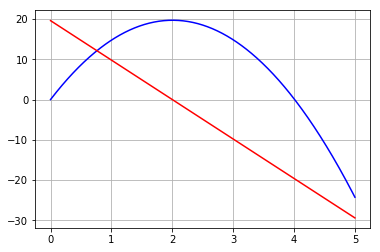

In [42]:
g, dt=9.8, 0.01
tt,xx,vv=[0.0],[0.0],[19.6]
t = 0.0

for i in range(0,500):
  t += dt
  x, v = euler(xx[-1],vv[-1])
  tt.append(t)
  xx.append(x)
  vv.append(v)


my_plot(xx, vv, tt)

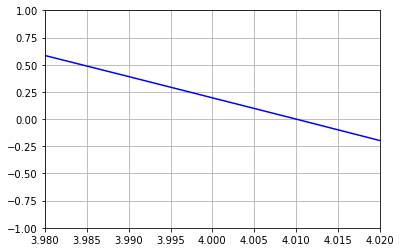

In [43]:
plt.plot(tt, xx, color = 'b')
plt.plot(tt, vv, color = 'r')
plt.xlim(3.98,4.02)
plt.ylim(-1,1)

plt.grid()
plt.show()

この条件では4.01秒後となります．解析的に得られる解4.00秒を数値解で得るには，Euler法の小時間刻みを細かくするか，Runge-Kutta法を使う必要があります.